In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from PIL import Image



In [10]:
def calcNormCdf(im,maxVal,res = 1):
    # Step 1: Calculate PDF (normalize histogram by number of pixels)
    # histogram, edges = np.histogram(im, bins,range )
    
    # # estimate the dataset's relative dynamic-range ratio out of the full dynamic-range
    # # maxVal is the max value of dynamic range
    # dr_ratio = 1/((np.max(im) - np.min(im))/(maxVal -0))
    # # estimate the full dynamic range out of the actual dynamic range of the dataset
    # partial_dr = np.unique(np.round(im,res)).shape[0]
    # numBins = int(np.ceil(dr_ratio *partial_dr))
    
    numBins = int(maxVal/res)+1
    histogram, edges = np.histogram(im,bins = numBins,range = (0,maxVal))
    pdf = histogram / float(np.sum(histogram))
    
    # Step 2: Calculate normalized CDF
    cdf = np.cumsum(pdf)
    return cdf,(pdf,edges)

def histeq(im,maxVal = 0):
    maxVal
    maxVal = np.max(im) if maxVal==0 else maxVal
    # Step 2: Calculate normalized CDF from the pdf (hitogram normalized by number of values)
    
    cdf,pdf = calcNormCdf(im,maxVal)
    # Step 3: Map intensities (pixel mapping lookup table)

    transform_map = np.floor(maxVal * cdf).astype(int)
    # transform_map = np.round(cdf * 255)
    


    # STEP 4: Transformation (Create new image)

    # flatten image array into 1D list
    img_list = list(im.flatten())
    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]
    # reshape and write back into img_array
    im_equalized = np.reshape(np.asarray(eq_img_list), im.shape)

    cdf_eq,pdf_eq = calcNormCdf(im_equalized,maxVal)

    
    return im_equalized ,(cdf,cdf_eq),(pdf,pdf_eq)

In [11]:
im = np.array(Image.open("Unequalized.jpg"))
# r, g, b = im[:,:,0],im[:,:,1],im[:,:,2]
# eq_image,cdf,pdf = histeq(r)
eq_im = im.copy()
for i in range(3):
    eq_image,cdf,pdf = histeq(im[:,:,i])
    eq_im[:,:,i] = eq_image


plt.figure()
plt.stairs(pdf[0][0], pdf[0][1], fill=True)
plt.stairs(pdf[1][0], pdf[1][1], fill=True)
plt.figure()
plt.plot(cdf[0],pdf[0][1])
plt.plot(cdf[1],pdf[1][1])
plt.figure()
plt.imshow(im)
plt.figure()

plt.imshow(eq_im)

<AxesSubplot: ylabel='Density'>

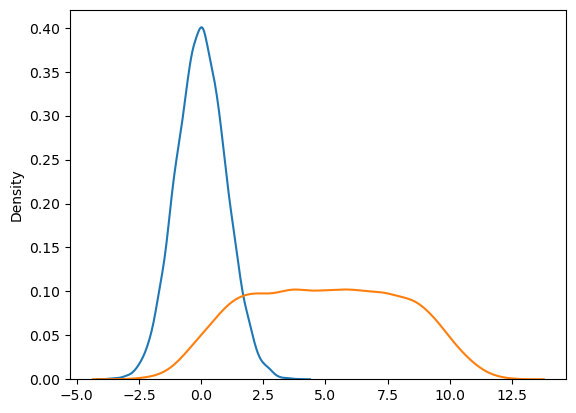

<AxesSubplot: ylabel='Density'>

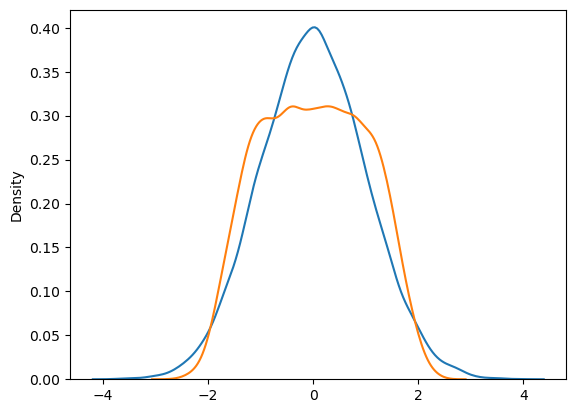

In [11]:
mu = np.mean(x1)
sigma = np.std(x1)

mu1, sigma1 = stats.norm.fit(x1)


y1  = x1/sigma-mu/sigma
y = x
sns.kdehist(y)
sns.kdeplot(y1)

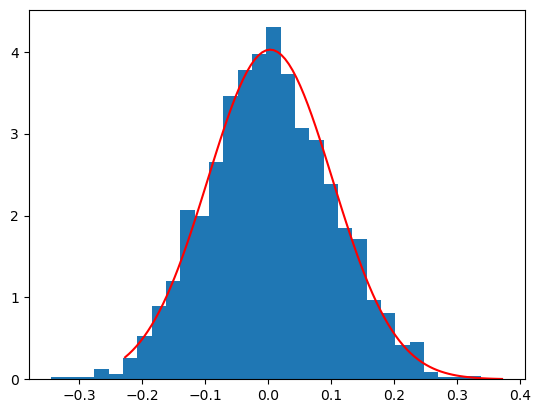

In [6]:



mu_true = 0
sigma_true = 0.1 
s = np.random.normal(mu_true, sigma_true, 2000)
mu, sigma = stats.norm.fit(s)
points = np.linspace(stats.norm.ppf(0.01,loc=mu,scale=sigma),
                 stats.norm.ppf(0.9999,loc=mu,scale=sigma),100)
pdf = stats.norm.pdf(points,loc=mu,scale=sigma)

plt.hist(s, 30, density=True);
plt.plot(points, pdf, color='r')
plt.show() 

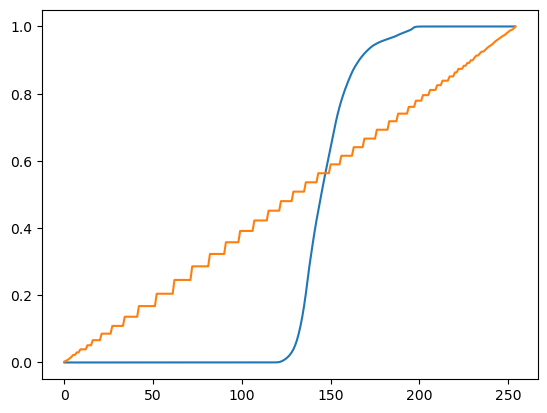

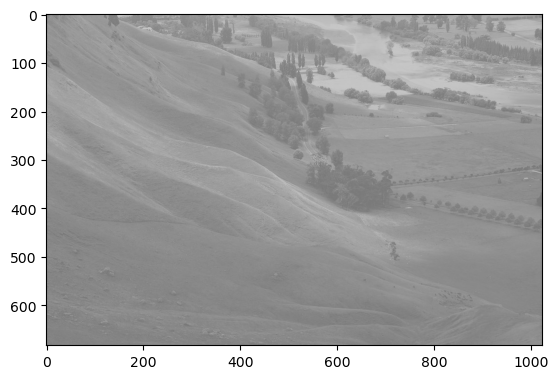

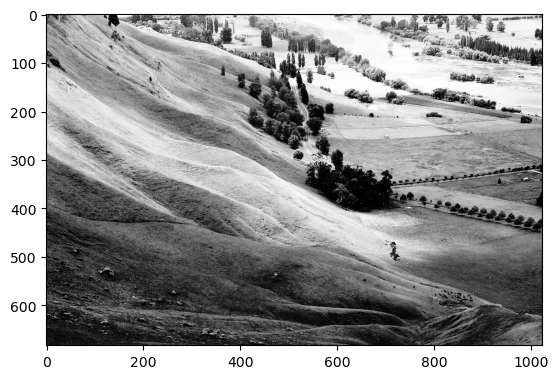

In [5]:
# https://towardsdatascience.com/histogram-equalization-5d1013626e64#:~:text=Histogram%20Equalization%20is%20a%20computer,intensity%20range%20of%20the%20image.


# histogram equalization on an arbitrary histogram
import numpy as np
def calcNormCdf(im, bins,range):
    # Step 1: Calculate PDF (normalize histogram by number of pixels)
    histogram, edges = np.histogram(im, bins,range )
    pdf = histogram / float(np.sum(histogram))
    
    # Step 2: Calculate normalized CDF
    cdf = np.cumsum(pdf)
    return cdf,pdf

def histeq(im,bins=255,range = (0,255)):
    
    # Step 2: Calculate normalized CDF from the pdf (hitogram normalized by number of values)
    cdf,pdf = calcNormCdf(im, bins,range)
    # Step 3: Map intensities (pixel mapping lookup table)

    transform_map = np.floor(255 * cdf).astype(np.uint8)
    # transform_map = np.round(cdf * 255)
    


    # STEP 4: Transformation (Create new image)

    # flatten image array into 1D list
    img_list = list(im.flatten())
    # transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]
    # reshape and write back into img_array
    im_equalized = np.reshape(np.asarray(eq_img_list), im.shape)

    cdf_eq,pdf_eq = calcNormCdf(im_equalized, bins,range)

    
    return im_equalized ,(cdf,cdf_eq),(pdf,pdf_eq)




im = np.array(Image.open("Unequalized.jpg"))
# r, g, b = im[:,:,0],im[:,:,1],im[:,:,2]
# eq_image,cdf,pdf = histeq(r)
eq_im = im.copy()
for i in range(3):
    eq_image,cdf,pdf = histeq(im[:,:,i])
    eq_im[:,:,i] = eq_image


plt.figure()
# plt.stairs(pdf[0], edges, fill=True)
# plt.stairs(pdf[1], edges, fill=True)
# plt.figure()
plt.plot(cdf[0])
plt.plot(cdf[1])
plt.figure()
plt.imshow(im)
plt.figure()

plt.imshow(eq_im)



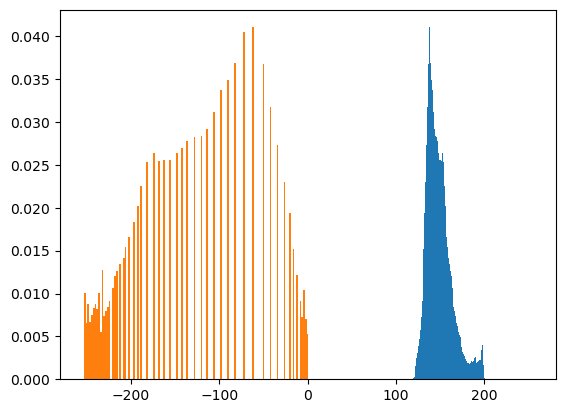

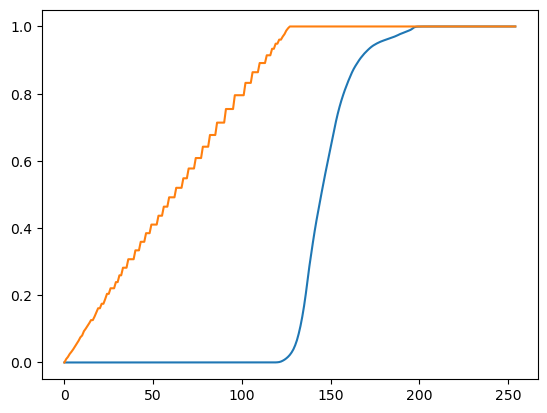

In [15]:
# https://towardsdatascience.com/histogram-equalization-5d1013626e64#:~:text=Histogram%20Equalization%20is%20a%20computer,intensity%20range%20of%20the%20image.


# histogram equalization on an arbitrary histogram
import numpy as np
def calcNormCdf(im, bins,range):
    # Step 1: Calculate PDF (normalize histogram by number of pixels)
    histogram, edges = np.histogram(im, bins,range )
    pdf = histogram / float(np.sum(histogram))
    
    # Step 2: Calculate normalized CDF
    cdf = np.cumsum(pdf)
    return cdf,(pdf,edges)

def mutualHisteq(im1,bins=255,histRange = (0,255)):
    
    # Step 2: Calculate normalized CDF from the pdf (hitogram normalized by number of values)
    cdf1,pdf1 = calcNormCdf(im1, bins,histRange)
    # cdf2,pdf2 = calcNormCdf(im2, bins,range)
    cdf2= -np.arange(255)/255
    # Step 3: Map intensities (pixel mapping lookup table)

    transform_map1 = np.floor(255 * cdf1).astype(np.uint8)
    transform_map1={}
    for i in range(cdf1.shape[0]):
        transform_map1[i] = int(np.floor((255-1) * cdf1[i]))
    transform_map2={}
    for i in np.unique(np.asarray(list(transform_map1.values()))):
        transform_map2[i] = int(np.floor(255 * cdf2[i]))
    
    # transform_map2 = np.floor(255 * cdf2).astype(np.uint8)

    # transform_map = np.round(cdf * 255)
    


    # STEP 4: Transformation (Create new image)

    # flatten image array into 1D list
    img_list = list(im1.flatten())
    # transform pixel values to equalize
    # eq_img_list = [transform_map1[p] for p in img_list]
    eq_img_list1 = [transform_map1[p] for p in img_list]
    eq_img_list2 = [transform_map2[p] for p in eq_img_list1]

    # eq_img_list2 = eq_img_list1
    # reshape and write back into img_array
    im_equalized = np.reshape(np.asarray(eq_img_list2), im1.shape)

    cdf_eq,pdf_eq = calcNormCdf(im_equalized,  bins,(-255,255))

    
    return im_equalized ,(cdf1,cdf_eq),(pdf1,pdf_eq)




im = np.array(Image.open("Unequalized.jpg"))
# r, g, b = im[:,:,0],im[:,:,1],im[:,:,2]
# eq_image,cdf,pdf = histeq(r)
eq_im = im.copy()
for i in range(3):
    eq_image,cdf,pdf = mutualHisteq(im[:,:,i])
    eq_im[:,:,i] = eq_image


plt.figure()
plt.stairs(pdf[0][0], pdf[0][1], fill=True)
plt.stairs(pdf[1][0], pdf[1][1], fill=True)
plt.figure()
plt.plot(cdf[0])
plt.plot(cdf[1])
# plt.figure()
# plt.imshow(im)
# plt.figure()

# plt.imshow(eq_im)

